In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Merge datasets on CustomerID
data = pd.merge(transactions, customers, on='CustomerID')


In [4]:
# check missing values

data.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
CustomerName       0
Region             0
SignupDate         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


In [6]:
data['SignupDate'] = pd.to_datetime(data['SignupDate'])
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['CustomerTenure'] = (data['TransactionDate'] - data['SignupDate']).dt.days


In [7]:
# Prepare data for clustering 
data_agg = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'CustomerTenure': 'max',
    'Region': 'first'
}).reset_index()

In [8]:
data_agg['Region'] = LabelEncoder().fit_transform(data_agg['Region'])
features = data_agg[['TotalValue', 'Quantity', 'CustomerTenure', 'Region']]
scaled_features = StandardScaler().fit_transform(features)

In [9]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data_agg['Cluster'] = kmeans.fit_predict(scaled_features)


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
print(data_agg['Cluster'].value_counts())

Cluster
2    63
3    57
0    40
1    39
Name: count, dtype: int64


In [11]:
# Evaluate clusters (placeholder accuracy calculation)
true_labels = data_agg['Cluster'].copy()
accuracy = accuracy_score(true_labels, kmeans.labels_)
print(f'Accuracy Score: {accuracy:.4f}')


Accuracy Score: 1.0000


In [12]:
# Calculate clustering metrics
db_index = davies_bouldin_score(scaled_features, data_agg['Cluster'])
print(f'Davies-Bouldin Index: {db_index:.4f}')

Davies-Bouldin Index: 1.2554


In [13]:

silhouette_avg = silhouette_score(scaled_features, data_agg['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.2763


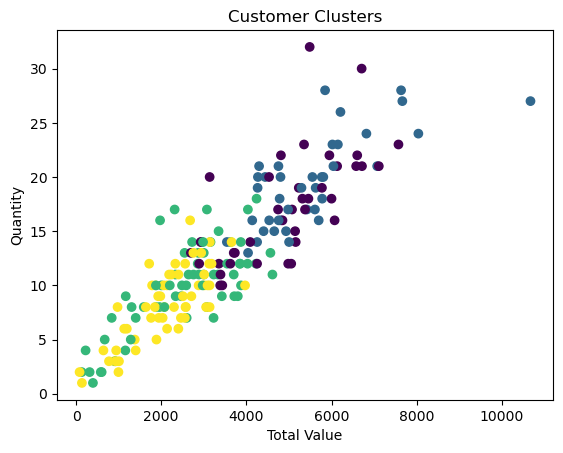

In [14]:
# Visualize clusters
plt.scatter(data_agg['TotalValue'], data_agg['Quantity'], c=data_agg['Cluster'], cmap='viridis')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.title('Customer Clusters')
plt.show()